In [151]:
# initial parameters

%matplotlib inline
# load libraries
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
import urllib.request
from pylab import rcParams
rcParams['figure.figsize'] = 9, 8  # set plot size

#### GET THE DATA

In [152]:
# read training and test data from the url link and save the file to your working directory
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"

urllib.request.urlretrieve(url, "poker_train.csv")

url2 = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data"

urllib.request.urlretrieve(url2, "poker_test.csv")

# read the data in and add column names
data_train = pd.read_csv("poker_train.csv", header=None,
                        names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])

data_test = pd.read_csv("poker_test.csv", header=None,
                        names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])

#### EXPLORE THE DATA

In [153]:
# summary statistics including counts, mean, stdev, quartiles for the training dataset
data_train.head(n=5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [154]:
data_train.dtypes # data types of each variable

S1       int64
C1       int64
S2       int64
C2       int64
S3       int64
C3       int64
S4       int64
C4       int64
S5       int64
C5       int64
CLASS    int64
dtype: object

In [155]:
data_train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


#### SUBSET THE DATA

In [156]:
# subset clustering variables
cluster=data_train[['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5']]

#### STANDARDIZE THE DATA

In [157]:
# standardize clustering variables to have mean=0 and sd=1 so that card suit and
# rank are on the same scale as to have the variables equally contribute to the analysis
clustervar=cluster.copy() # create a copy
clustervar['S1']=preprocessing.scale(clustervar['S1'].astype('float64'))
clustervar['C1']=preprocessing.scale(clustervar['C1'].astype('float64'))
clustervar['S2']=preprocessing.scale(clustervar['S2'].astype('float64'))
clustervar['C2']=preprocessing.scale(clustervar['C2'].astype('float64'))
clustervar['S3']=preprocessing.scale(clustervar['S3'].astype('float64'))
clustervar['C3']=preprocessing.scale(clustervar['C3'].astype('float64'))
clustervar['S4']=preprocessing.scale(clustervar['S4'].astype('float64'))
clustervar['C4']=preprocessing.scale(clustervar['C4'].astype('float64'))
clustervar['S5']=preprocessing.scale(clustervar['S5'].astype('float64'))
clustervar['C5']=preprocessing.scale(clustervar['C5'].astype('float64'))

# The data has been already split data into train and test sets
clus_train = clustervar

#### K-MEANS ANALYSIS - INITIAL CLUSTER SET

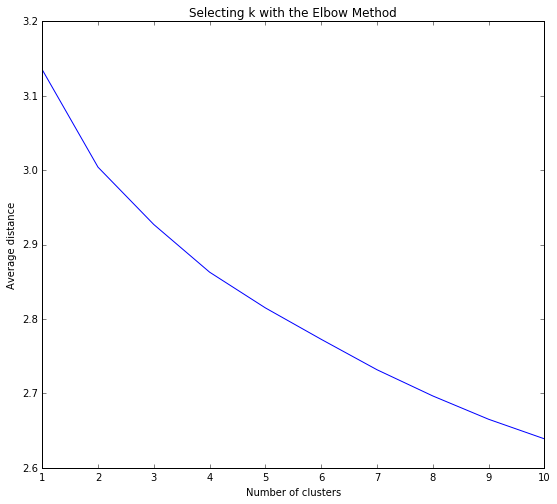

In [158]:
# k-means cluster analysis for 1-10 clusters due to the 10 possible class outcomes for poker hands                                                       
from scipy.spatial.distance import cdist
clusters=range(1,11)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))
    / clus_train.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') # pick the fewest number of clusters that reduces the average distance

#### Interpret 2 cluster solution

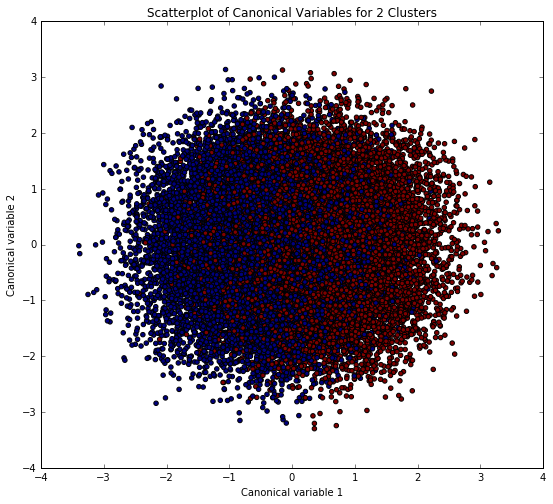

In [159]:
model3=KMeans(n_clusters=2)
model3.fit(clus_train) # has cluster assingments based on using 2 clusters
clusassign=model3.predict(clus_train)
# plot clusters
''' Canonical Discriminant Analysis for variable reduction:
1. creates a smaller number of variables
2. linear combination of clustering variables
3. Canonical variables are ordered by proportion of variance accounted for
4. most of the variance will be accounted for in the first few canonical variables
'''
from sklearn.decomposition import PCA # CA from PCA function
pca_2 = PCA(2) # return 2 first canonical variables
plot_columns = pca_2.fit_transform(clus_train) # fit CA to the train dataset
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,) # plot 1st canonical variable on x axis, 2nd on y-axis
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show() # close or overlapping clusters idicate correlated variables with low in-class variance but not good separation. 2 cluster might be better.

#### BEGIN multiple steps to merge cluster assignment with clustering variables to examine cluster variable means by cluster

In [160]:
# create a unique identifier variable from the index for the
# cluster training data to merge with the cluster assignment variable
clus_train.reset_index(level=0, inplace=True)
# create a list that has the new index variable
cluslist=list(clus_train['index'])
# create a list of cluster assignments
labels=list(model3.labels_)
# combine index variable list with cluster assignment list into a dictionary
newlist=dict(zip(cluslist, labels))
newlist
# convert newlist dictionary to a dataframe
newclus=DataFrame.from_dict(newlist, orient='index')
newclus
# rename the cluster assignment column
newclus.columns = ['cluster']

# now do the same for the cluster assignment variable create a unique identifier variable from the index for the
# cluster assignment dataframe to merge with cluster training data
newclus.reset_index(level=0, inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
# cluster frequencies
merged_train.cluster.value_counts()

1    12572
0    12438
Name: cluster, dtype: int64

#### calculate clustering variable means by cluster

In [161]:
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)

Clustering variable means by cluster
                index        S1        C1        S2        C2        S3  \
cluster                                                                   
0        12588.264190  0.017793  0.000261  0.025325  0.002400 -0.900274   
1        12421.628619 -0.017604 -0.000258 -0.025056 -0.002375  0.890678   

               C3        S4        C4        S5        C5  
cluster                                                    
0       -0.016081  0.013020 -0.005822  0.029201  0.008262  
1        0.015910 -0.012881  0.005760 -0.028890 -0.008174  


#### validate clusters in training data by examining cluster differences in CLASS using ANOVA first have to merge CLASS of poker hand with clustering variables and cluster assignment data

In [162]:
# split into test / train for class
pokerhand_train=data_train['CLASS']
pokerhand_test=data_test['CLASS']
# put into a pandas dataFrame
pokerhand_train=pd.DataFrame(pokerhand_train)
pokerhand_test=pd.DataFrame(pokerhand_test)
pokerhand_train.reset_index(level=0, inplace=True) # reset index
merged_train_all=pd.merge(pokerhand_train, merged_train, on='index') # merge the pokerhand train with merged clusters
sub1 = merged_train_all[['CLASS', 'cluster']].dropna()

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

# respone formula
pokermod = smf.ols(formula='CLASS ~ cluster', data=sub1).fit()
print (pokermod.summary())

print ('means for Poker hands by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

print ('standard deviations for Poker hands by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

mc1 = multi.MultiComparison(sub1['CLASS'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                  CLASS   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1724
Date:                Wed, 25 May 2016   Prob (F-statistic):              0.678
Time:                        16:00:35   Log-Likelihood:                -29540.
No. Observations:               25010   AIC:                         5.908e+04
Df Residuals:                   25008   BIC:                         5.910e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6191      0.007     87.576      0.0